### Peace and War Game

This is a question in Game Theory, similar to the Prisoner's Dilema, instead we have two countries, A and B, where they have a choice between Going for War(W) or making Peace(P). The payoff matrix is as follows.

$$
\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}
$$

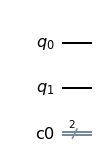

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister

q=QuantumRegister(2,name="q")
c=ClassicalRegister(2)

qc=QuantumCircuit(q,c)

qc.draw('mpl')

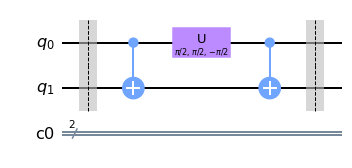

In [2]:
from math import pi

# Entangling operator

qc.barrier()
qc.cx(q[0],q[1])
qc.u(pi/2,pi/2,-pi/2,q[0])
qc.cx(q[0],q[1])
qc.barrier()

qc.draw('mpl')

In [3]:
from qiskit.quantum_info import Statevector

psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

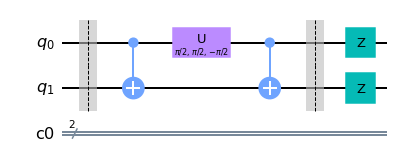

In [4]:
# Player's quantum moves operator

qc.z(q[0])
qc.z(q[1])

qc.draw('mpl')

In [5]:
from qiskit.quantum_info import Statevector

psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

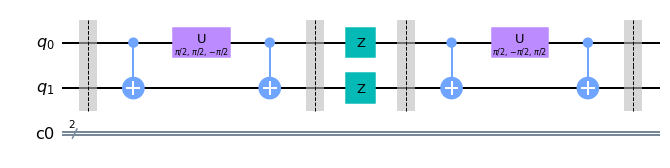

In [6]:
# Disentangling operator

qc.barrier()
qc.cx(q[0],q[1])
qc.u(pi/2,-pi/2,pi/2,q[0])
qc.cx(q[0],q[1])
qc.barrier()

qc.draw('mpl')

In [7]:
from qiskit.quantum_info import Statevector

psi=Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

In [8]:
qc.measure(q,c)


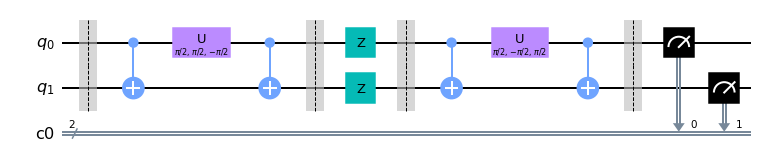

In [9]:
qc.draw('mpl')

{'00': 1024}


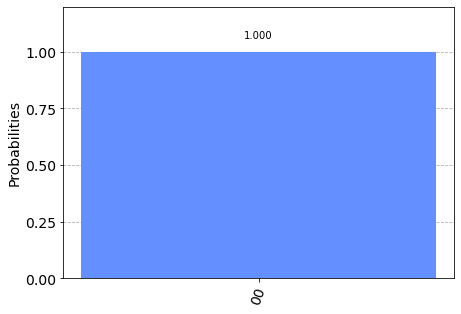

In [10]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend=QasmSimulator()
qc_compiled=transpile(qc,backend)
job = backend.run(qc_compiled,shot=1024)
result=job.result()
counts=result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts,sort="value")